In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

In [2]:
# Function to visualize clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

### Dataset 1: make_moons (Non-spherical clusters, DBSCAN should excel)

In [3]:
# Create a dataset with non-linearly separable clusters
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)

# Standardize the dataset (important for distance-based algorithms like DBSCAN)
X_moons_scaled = StandardScaler().fit_transform(X_moons)

#### DBSCAN

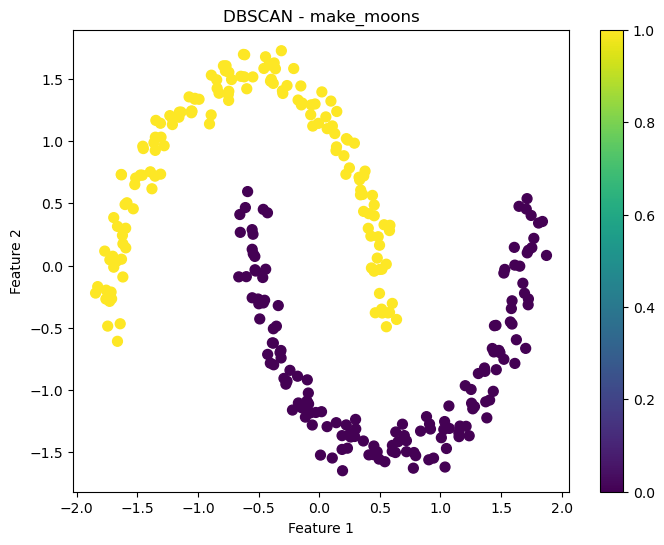

In [4]:
# Apply DBSCAN
dbscan_moons = DBSCAN(eps=0.3, min_samples=5)
labels_dbscan_moons = dbscan_moons.fit_predict(X_moons_scaled)

# Visualize the clustering results
plot_clusters(X_moons_scaled, labels_dbscan_moons, 'DBSCAN - make_moons')

#### K-Means

c:\Users\SHEONA HANS\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


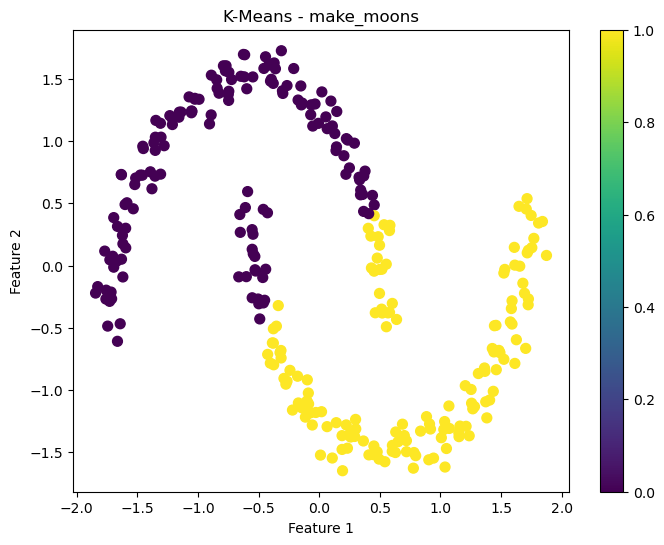

In [5]:
# Apply K-Means
kmeans_moons = KMeans(n_clusters=2, random_state=42)
labels_kmeans_moons = kmeans_moons.fit_predict(X_moons_scaled)

# Visualize the clustering results
plot_clusters(X_moons_scaled, labels_kmeans_moons, 'K-Means - make_moons')

#### HIERARCHICAL CLUSTERING

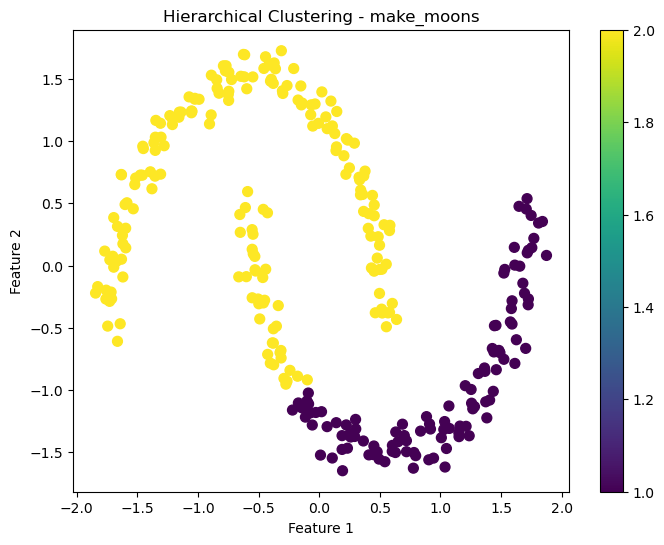

In [6]:
# Apply Hierarchical Clustering
linked = linkage(X_moons_scaled, 'ward')
labels_hierarchical_moons = fcluster(linked, 2, criterion='maxclust')

# Visualize the clustering results
plot_clusters(X_moons_scaled, labels_hierarchical_moons, 'Hierarchical Clustering - make_moons')

### Dataset 2: make_blobs (Varying densities, DBSCAN should struggle)

In [7]:
# Create a dataset with varying densities
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Standardize the dataset
X_blobs_scaled = StandardScaler().fit_transform(X_blobs)

#### DBSCAN

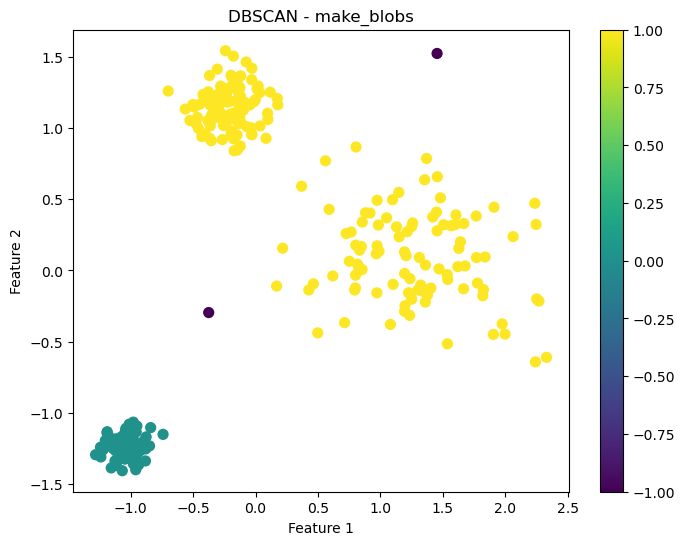

In [8]:
# Apply DBSCAN (with a large eps value to show struggles)
dbscan_blobs = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan_blobs = dbscan_blobs.fit_predict(X_blobs_scaled)

# Visualize the clustering results
plot_clusters(X_blobs_scaled, labels_dbscan_blobs, 'DBSCAN - make_blobs')


#### K-MEANS

c:\Users\SHEONA HANS\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


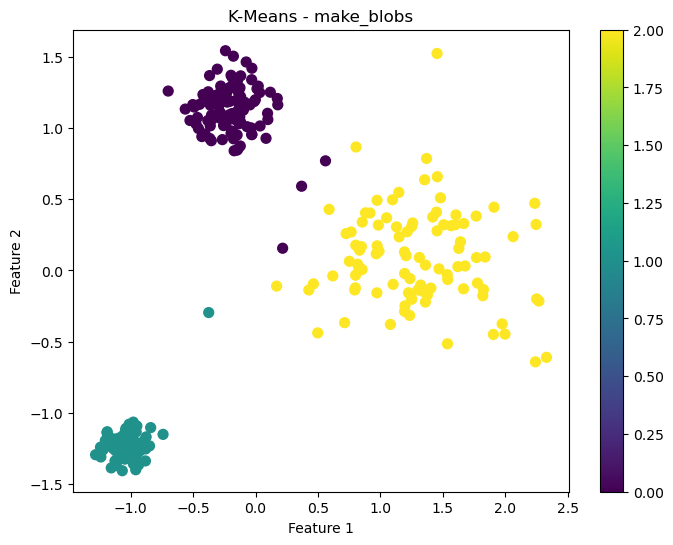

In [9]:
# Apply K-Means
kmeans_blobs = KMeans(n_clusters=3, random_state=42)
labels_kmeans_blobs = kmeans_blobs.fit_predict(X_blobs_scaled)

# Visualize the clustering results
plot_clusters(X_blobs_scaled, labels_kmeans_blobs, 'K-Means - make_blobs')

#### HIERARCHICAL CLUSTERING

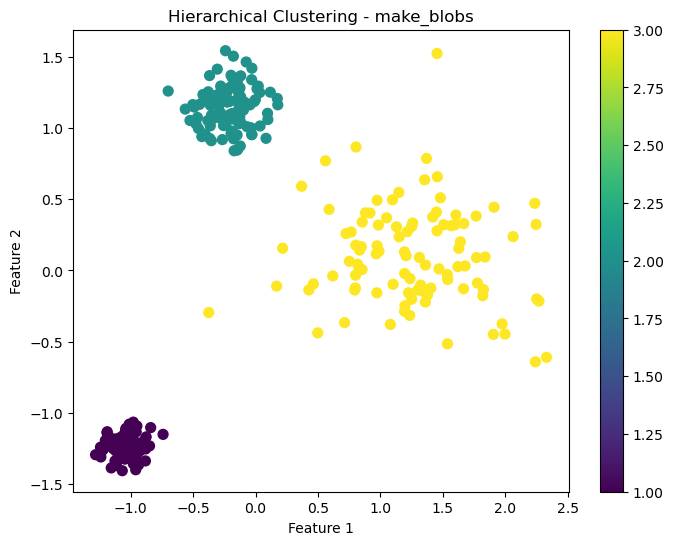

In [10]:
# Apply Hierarchical Clustering
linked = linkage(X_blobs_scaled, 'ward')
labels_hierarchical_blobs = fcluster(linked, 3, criterion='maxclust')

# Visualize the clustering results
plot_clusters(X_blobs_scaled, labels_hierarchical_blobs, 'Hierarchical Clustering - make_blobs')

### Performance Evaluation 

In [11]:
# Print silhouette score to evaluate how well the algorithms performed
def evaluate_clustering(X, labels, algorithm_name):
    score = silhouette_score(X, labels)
    print(f"Silhouette Score for {algorithm_name}: {score:.4f}")

#### DBSCAN

In [13]:
evaluate_clustering(X_moons_scaled, labels_dbscan_moons, "DBSCAN - make_moons")
evaluate_clustering(X_blobs_scaled, labels_dbscan_blobs, "DBSCAN - make_blobs")

Silhouette Score for DBSCAN - make_moons: 0.3860
Silhouette Score for DBSCAN - make_blobs: 0.4850


#### K-MEANS

In [14]:
evaluate_clustering(X_moons_scaled, labels_kmeans_moons, "K-Means - make_moons")
evaluate_clustering(X_blobs_scaled, labels_kmeans_blobs, "K-Means - make_blobs")

Silhouette Score for K-Means - make_moons: 0.4955
Silhouette Score for K-Means - make_blobs: 0.7866


#### HIERARCHICAL CLUSTERING

In [15]:
evaluate_clustering(X_moons_scaled, labels_hierarchical_moons, "Hierarchical - make_moons")
evaluate_clustering(X_blobs_scaled, labels_hierarchical_blobs, "Hierarchical - make_blobs")

Silhouette Score for Hierarchical - make_moons: 0.4487
Silhouette Score for Hierarchical - make_blobs: 0.7833
